### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

* Import the required libraries and modules that you would need.
* Read that data into Python and call the dataframe churnData.
* Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
* Check for null values in the dataframe. Replace the null values.
* Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    * Scale the features either by using normalizer or a standard scaler.
    * Split the data into a training set and a test set.
    * Fit a logistic regression model on the training data.
    * Check the accuracy on the test data.
Note: So far we have not balanced the data.

* Managing imbalance in the dataset

    * Check for the imbalance.
    * Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
    * Each time fit the model and see how the accuracy of the model is.

### Import libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, fbeta_score
from sklearn.linear_model import LogisticRegression

#OVER/DOWN SAMPLING

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [55]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


### Load dataset

In [3]:
data = pd.read_csv("files_for_lab/Customer-Churn.csv")

In [4]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Preprocesing | EDA

In [5]:
# Understanding dataset

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [12]:
# We can see that TotalCharges is a numeric column but it has an object data type. Let's see what is inside.

data['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [18]:
#We change de attribute data type

data[['TotalCharges']] = data[['TotalCharges']].apply(pd.to_numeric, errors='coerce')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [24]:
#Now we should look for null values

data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [26]:
nan_proportion = data["TotalCharges"].isna().sum()/len(data['TotalCharges'])
nan_proportion

0.001561834445548772

In [ ]:
#As the nan represent a very little proportion of the dataset we could either remove them or replace them with the mean value of the column. 
#For the beginning we will replace them with the mean just to not lose the information. We will see what happens with this attribute afterwards. 

In [27]:
data['TotalCharges'] = data['TotalCharges'].replace(np.nan,data['TotalCharges'].mean())
# data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [28]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Feature engineering

In [29]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

In [31]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = data['Churn']

In [32]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


### Train | Test Spli

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaler

In [40]:
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Checking the data imbalance

In [42]:
y_train.value_counts(normalize=True)

No     0.733582
Yes    0.266418
Name: Churn, dtype: float64

In [ ]:
# Data is clearly imbalanced


In [43]:
y_test.value_counts()

No     1041
Yes     368
Name: Churn, dtype: int64

### Applying model

In [51]:
def model_report(variable, target, model):
    model.fit(variable, target)
    pred_train = model.predict(variable)
    pred_test = model.predict(X_test)
    print('Train set report', classification_report(y_test, pred_test))
    cm = confusion_matrix(y_test, pred_test)
    matrix = plot_confusion_matrix(model, X_test, y_test)
    plt.show()

### Apply baseline model

Train set report               precision    recall  f1-score   support

          No       0.82      0.90      0.86      1041
         Yes       0.62      0.46      0.53       368

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


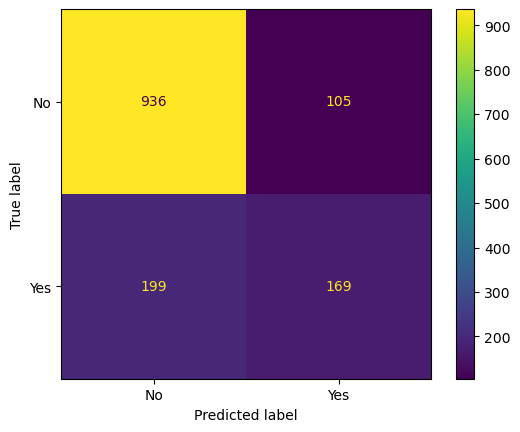

In [52]:
model_report(X_train, y_train, LogisticRegression())

### Apply Oversampling --> SMOTE

In [58]:
sm = SMOTE(k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

Train set report               precision    recall  f1-score   support

          No       0.87      0.72      0.79      1041
         Yes       0.47      0.71      0.57       368

    accuracy                           0.72      1409
   macro avg       0.67      0.71      0.68      1409
weighted avg       0.77      0.72      0.73      1409



C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


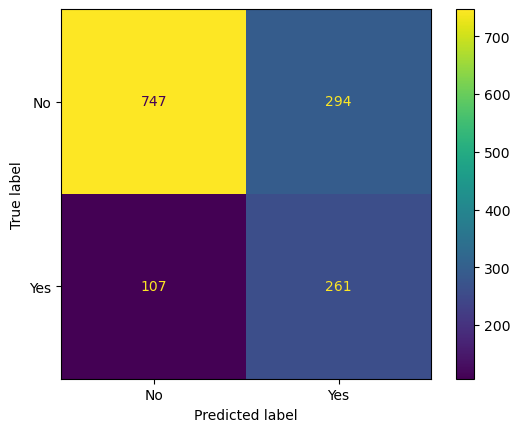

In [59]:
model_report(X_train_SMOTE, y_train_SMOTE, LogisticRegression())

### Apply Downsampling --> TomekLinks

In [61]:
tl = TomekLinks(sampling_strategy='all')
X_train_TL, y_train_TL = tl.fit_resample(X_train, y_train)

Train set report               precision    recall  f1-score   support

          No       0.82      0.90      0.86      1041
         Yes       0.62      0.46      0.53       368

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


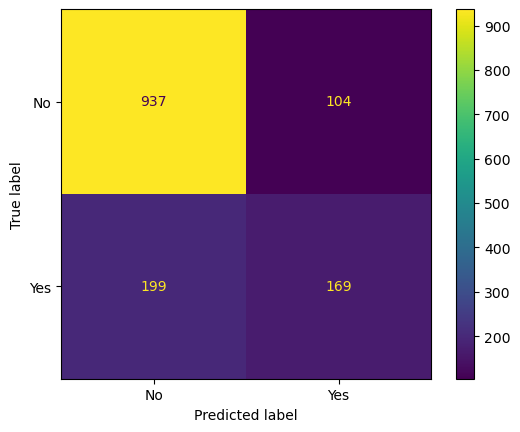

In [62]:
model_report(X_train_TL, y_train_TL, LogisticRegression())

### Combine Over & Down Sampling --> Smote + Tomek

In [86]:
st = SMOTETomek(tomek=TomekLinks(sampling_strategy='all'), smote=SMOTE(k_neighbors=4))
X_train_ST, y_train_ST = st.fit_resample(X_train, y_train)

Train set report               precision    recall  f1-score   support

          No       0.88      0.72      0.79      1041
         Yes       0.47      0.71      0.57       368

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.72      0.73      1409



C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


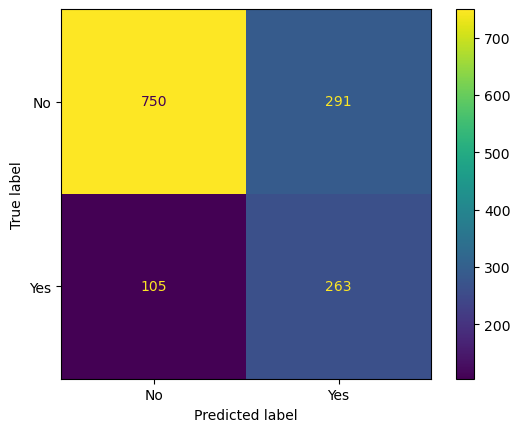

In [87]:
model_report(X_train_ST, y_train_ST, LogisticRegression())

### Other ways to manage imbalance data set. Used in the mid Proyect

### Weighted logistic regression

REPORT ON TEST SET

               precision    recall  f1-score   support

          No       0.87      0.71      0.79      1041
         Yes       0.47      0.71      0.56       368

    accuracy                           0.71      1409
   macro avg       0.67      0.71      0.68      1409
weighted avg       0.77      0.71      0.73      1409



C:\Users\Jobandtalent\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


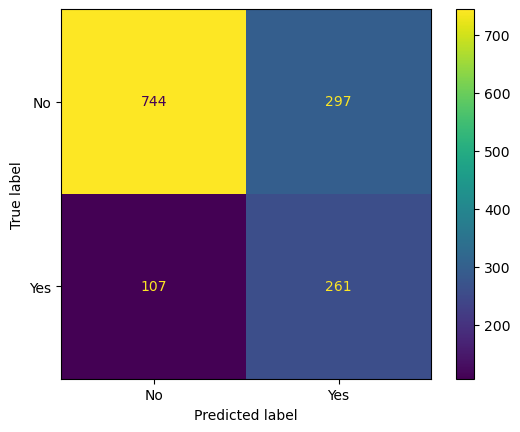

In [88]:
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    # print('REPORT ON TRAIN SET\n\n', classification_report(target_data, pred_train))
    print('REPORT ON TEST SET\n\n', classification_report(y_test, pred_test))
    cm = confusion_matrix(y_test, pred_test)
    matrix = plot_confusion_matrix(model, X_test, y_test)
    plt.show()